# K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a supervised learning model where the label of each datapoint is calculated using the majority of labels of $\textit{k}$ nearest neighbors to that datapoint. To this end, for each datapoint in the given set, the distance (manhattan or euclidean) between the sample and all datapoints in the training set is calculated, the top $\textit{k}$ nearest distances are selected, and the majority of the labels among the nearest neigbors is considered as the label of the sample of interest.

It is worth noting that the current document is based on the guidelines provided in https://www.youtube.com/watch?v=rTEtEy5o3X0.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
from collections import Counter
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### Define Required Functions

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

### KNN Class

In [3]:
class KNN:
    def __init__(self, k=3, mode='classification'):
        self.k = k
        self.mode = mode

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]

        return predictions

    # a help function to return the label for each datapoint
    def _predict(self, x):
        # compute the distance between x and all points in self.X_train
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        nearest_indices = np.argsort(distances)[:self.k]
        nearest_labels = [self.y_train[i] for i in nearest_indices]

        if self.mode == 'classification':
            # majority vote
            most_common = Counter(nearest_labels).most_common()
    
            # most_common is a list with items as (label, count)
            # therefore, we need to return the first item of the first element
            return most_common[0][0]
        elif self.mode == 'regression':
            # mean
            return np.mean(nearest_labels)

## Classification

### Import Required Libraries

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Define Required Functions

In [5]:
def plot(x1, x2, y, title):
    legend = ['setosa', 'versicolor', 'virginica']
    
    plt.Figure(figsize=(12, 6))
    for class_val in np.unique(y):
        plt.scatter(x1[y==class_val], x2[y==class_val], cmap=cmap(class_val),
                    label=legend[class_val], edgecolor='k', s=30)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(title)
    plt.legend(legend)
    plt.show()

### Import Data

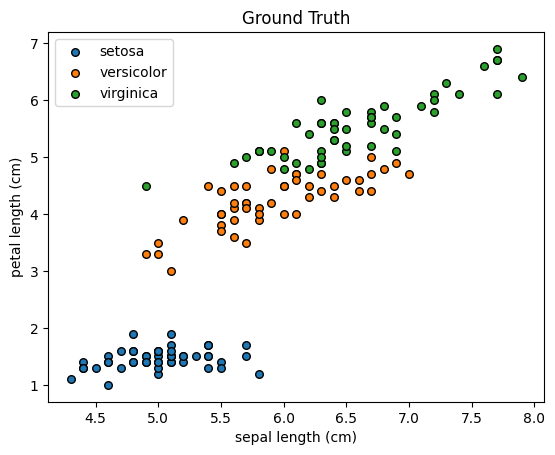

In [6]:
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target
plot(X[:,0], X[:,2], y, "Ground Truth")

### Train-Test Data

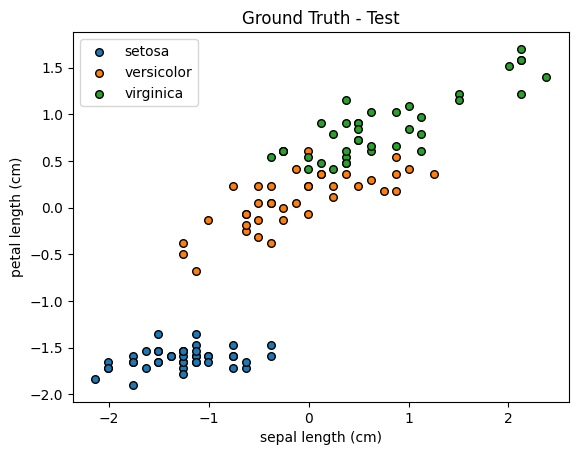

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plot(X_test_scaled[:, 0], X_test_scaled[:, 2], y_test, "Ground Truth - Test")

### Implement Manual KNN

In [8]:
# train
clf = KNN()
clf.fit(X_train_scaled, y_train)

# inference
y_pred = clf.predict(X_test_scaled)

# evaluations
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of Predictions with k = {clf.k}: {accuracy}")

Accuracy of Predictions with k = 3: 0.95


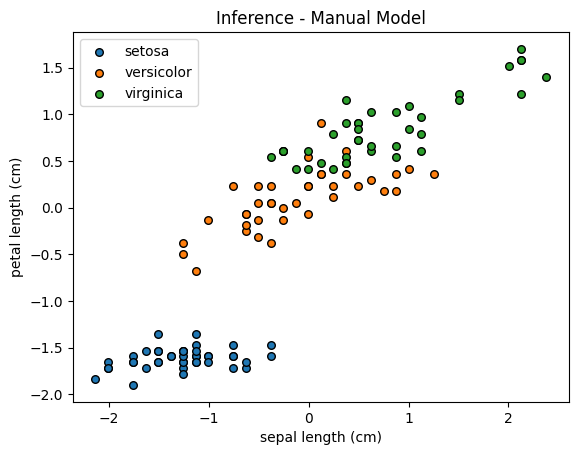

In [9]:
plot(X_test_scaled[:, 0], X_test_scaled[:, 2], y_pred, "Inference - Manual Model")

### Implement Manual KNN - with k = 5

In [10]:
# train
clf_5 = KNN(k=5)
clf_5.fit(X_train_scaled, y_train)

# inference
y_pred_5 = clf_5.predict(X_test_scaled)

# evaluations
accuracy_5 = np.mean(y_pred_5 == y_test)
print(f"Accuracy of Predictions with k = {clf_5.k}: {accuracy_5}")

Accuracy of Predictions with k = 5: 0.9333333333333333


## Compare with Sklearn KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# train
clf_sklearn = KNeighborsClassifier()
clf_sklearn.fit(X_train_scaled, y_train)

# inference
preds = clf_sklearn.predict(X_test_scaled)

# evalauations
accuracy_sklearn = np.mean(preds == y_test)
print(f"Accuracy of Sklearn Predictions with k = {clf_sklearn.n_neighbors}: {accuracy_sklearn}")

Accuracy of Sklearn Predictions with k = 5: 0.9333333333333333


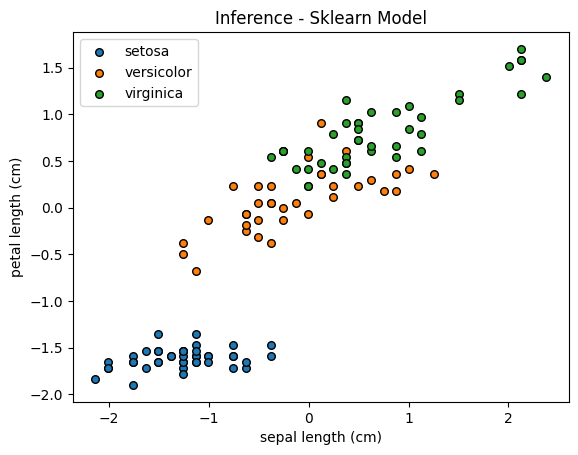

In [13]:
plot(X_test_scaled[:, 0], X_test_scaled[:, 2], preds, "Inference - Sklearn Model")

### Regression

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
def plot(X, y, title):
    plt.Figure(figsize=(12, 6))
    plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

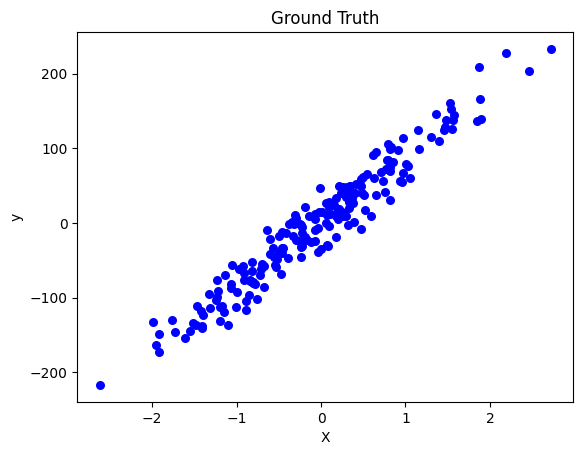

In [16]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# plot data
plot(X, y, "Ground Truth")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
reg = KNN(mode='regression')
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
loss = mean_squared_error(y_pred, y_test)
print(f"MSE of Predictions with K = {reg.k}: {loss}")

MSE of Predictions with K = 3: 627.8167777891715


In [19]:
reg_2 = KNN(k=2, mode='regression')
reg_2.fit(X_train_scaled, y_train)
y_pred = reg_2.predict(X_test_scaled)
loss = mean_squared_error(y_pred, y_test)
print(f"MSE of Predictions with K = {reg_2.k}: {loss}")

MSE of Predictions with K = 2: 710.7093176450594


In [20]:
reg_4 = KNN(k=4, mode='regression')
reg_4.fit(X_train_scaled, y_train)
y_pred = reg_4.predict(X_test_scaled)
loss = mean_squared_error(y_pred, y_test)
print(f"MSE of Predictions with K = {reg_4.k}: {loss}")

MSE of Predictions with K = 4: 692.5385481716798


In [21]:
reg_5 = KNN(k=5, mode='regression')
reg_5.fit(X_train_scaled, y_train)
y_pred = reg_5.predict(X_test_scaled)
loss = mean_squared_error(y_pred, y_test)
print(f"MSE of Predictions with K = {reg_5.k}: {loss}")

MSE of Predictions with K = 5: 673.9889657584646
